In [4]:
import os
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [5]:
data_dir = "./data/SAVEE"

filenames = tf.io.gfile.glob(str(data_dir) + '/*')
filenames = tf.random.shuffle(filenames)
num_samples = len(filenames)
print('Number of total examples:', num_samples)
print('Example file tensor:', filenames[0])

Number of total examples: 480
Example file tensor: tf.Tensor(b'.\\data\\SAVEE\\JE_a08.wav', shape=(), dtype=string)


In [24]:
train_files = filenames[:300]
val_files = filenames[300: 300 + 100]
test_files = filenames[-80:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 300
Validation set size 100
Test set size 80


In [6]:
test_file = tf.io.read_file(f"{data_dir}/DC_a01.wav")
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

TensorShape([160868, 1])

In [23]:
def decode_audio(audio_binary):
  # Decode WAV-encoded audio files to `float32` tensors, normalized
  # to the [-1.0, 1.0] range. Return `float32` audio and a sample rate.
  audio, _ = tf.audio.decode_wav(contents=audio_binary)
  # Since all the data is single channel (mono), drop the `channels`
  # axis from the array.
  return tf.squeeze(audio, axis=-1)

def get_label(file_path):
    parts = tf.strings.regex_replace(file_path, '.+\_|[0-9]+.wav', '')
    return parts

def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

In [57]:
targets = waveform_ds.map(lambda _, target: target)
n_classes = len(list(targets.unique()))

print(f'{n_classes} classes')

7 classes


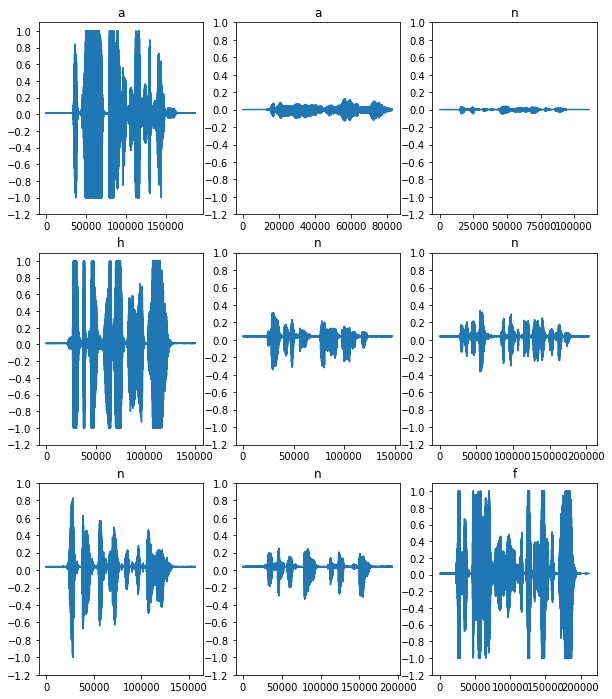

In [58]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()